In [118]:
import sys
sys.path.append("..")

import tensorflow as tf
import matplotlib.pyplot as plt

from experiment_parser import parse_experiment_file
from augmented_model_generator import get_augmented_model_and_preprocess
from tensorflow.keras.applications.mobilenet import preprocess_input
from tqdm import tqdm

In [87]:
def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.resize(image, [224, 224])
    
    return image

 15%|█▌        | 9/60 [00:12<01:08,  1.34s/it]

 32%|███▏      | 19/60 [00:31<00:59,  1.46s/it]

 65%|██████▌   | 39/60 [01:25<00:49,  2.35s/it]

 75%|███████▌  | 45/60 [02:02<00:56,  3.80s/it]

 82%|████████▏ | 49/60 [02:10<00:26,  2.42s/it]

 98%|█████████▊| 59/60 [02:58<00:02,  2.86s/it]

100%|██████████| 60/60 [03:17<00:00,  3.29s/it]


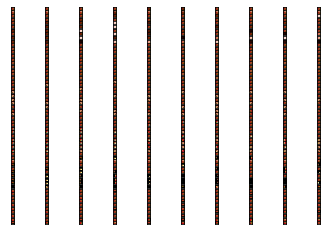

In [119]:
experiments = parse_experiment_file("../experiments/one_techs_high_intensity_ava.yaml")

num_experiments = len(experiments['exps'])
seed = experiments['seed']
img = tf.expand_dims(parse_image('AoSTHRobotnik.jpg'), axis=0)

fig, axes = plt.subplots(num_experiments, 10, figsize=(800,45))
for i in tqdm(range(num_experiments)):
    exp = experiments['exps'][i]
    model_with_augmentation, _ = get_augmented_model_and_preprocess(exp, seed)
    augmentator = tf.keras.models.Model(inputs=model_with_augmentation.input, outputs=model_with_augmentation.layers[0].output)
    for j in range(10):
        input_augmented = (preprocess_input(((augmentator(img, training=True)[0]))) + 1) / 2
        axes[i,j].imshow(input_augmented)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        
plt.show()